In [ ]:
import pandas as pd
import glob

# Get a list of all csv files in the current directory
path = r'.' # use your path
all_files = glob.glob(path + "/*.csv")

# Create a dictionary to hold the dataframes
dfs = {}

# Read each csv file into a dataframe and store it in the dictionary
for filename in all_files:
    # df = pd.read_csv(filename, index_col=None, header=0)

    df = pd.read_csv(filename, header=0, skiprows=0, index_col=None, low_memory=False)
    # Convert numeric columns to float, ignoring non-numeric data
    df = df.apply(pd.to_numeric, errors='coerce')
    # Drop rows with any NaN values resulting from non-numeric data
    df = df.dropna()    
    df = df[(df > -1e6).all(axis=1) & (df < 1e6).all(axis=1)]
    

    # Use the filename (without the .csv extension) as the key
    key = filename.split('/')[-1].split('\\')[-1].replace('.csv', '')
    dfs[key] = df

# You can now access each dataframe using its filename as a key, e.g., dfs['your_file_name']
print(f"Loaded {len(dfs)} csv files: {list(dfs.keys())}")

Loaded 6 csv files: ['log_20250622_215629', 'log_20250622_222654', 'log_20250622_222347', 'log_20250622_220358', 'log_20250622_221057', 'log_20250622_221022']


In [ ]:

# df = dfs['log_20250622_221022'] # too short
# df = dfs['log_20250622_222347'] # too short 
# df = dfs['log_20250622_222347'] # too short, not enough data

# df = dfs['log_20250622_215629'] # lots of prematured steps, long enough
# df = dfs['log_20250622_222654'] # some unstable gait, long enough
# df = dfs['log_20250622_220358']  # till 1000 is good, but not enough data
df = dfs['log_20250622_221057'] # some unstable gait, long enough

# print(df.head())
# print(df["GAIT_PHASE"])
# print(df.columns)

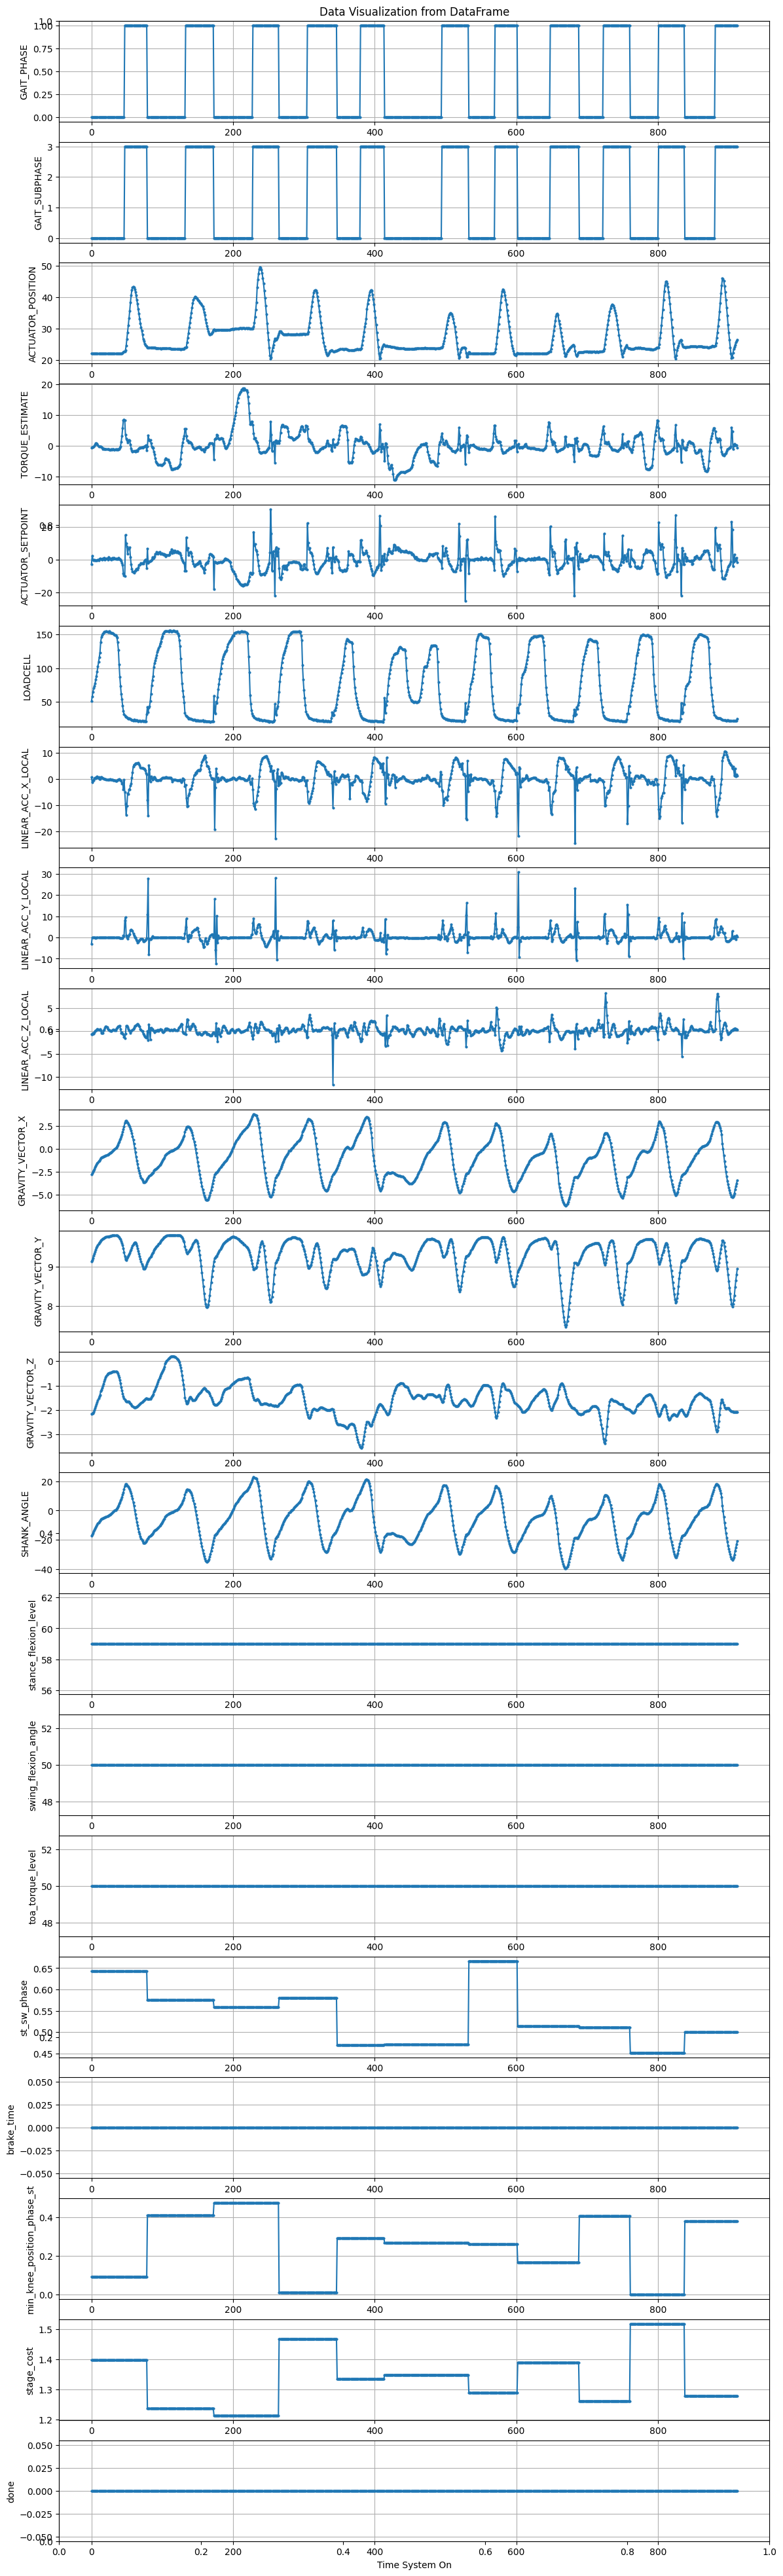

In [7]:

# visualize the dataframe

import matplotlib.pyplot as plt
# subplot for each column except 'TIME_SYSTEM_ON'
plt.figure(figsize=(14, 50))
plt.tight_layout()

plt.title('Data Visualization from DataFrame')
plt.xlabel('Time System On')

for column in df.columns:
    if column != 'TIME_SYSTEM_ON':
        plt.subplot(len(df.columns) - 1, 1, list(df.columns).index(column))
        plt.plot( df[column], marker='o', linestyle='-', label=column, markersize=2)
        plt.ylabel(column)
        plt.grid(True)  